# Importing Libraries: 

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
import joblib as jb

# Reading data: 

In [12]:
df = pd.read_csv('Pakistani_Diabetes_Dataset.csv')

In [13]:
df.head(5)

,Age_Group,Gender,Height_Feet,Height_Inches,Weight_Kg,BMI,HbA1c,Glucose_Fasting,Creatinine,Serum_Cholesterol,HDL_Cholesterol,Serum_Triglycerides,LDL_Cholesterol,VLDL_Cholesterol,Hemoglobin,CGFR,Diabetes_Detection,Diabetes_Level,Sugar_Type
0,31-45,Female,4.0,48.0,67.5,25.5,4.3,70.0,0.69,174.7,50.6,196.1,84.8,39.2,12.2,94.9,Not Detected,Normal,No Diabetes
1,76+,Female,4.0,48.0,53.3,22.2,5.1,96.9,1.23,265.6,43.6,231.2,175.8,46.2,10.3,41.9,Not Detected,Normal,No Diabetes
2,46-60,Female,4.0,48.0,46.0,16.9,5.8,126.1,1.06,229.4,48.6,190.9,142.6,38.2,12.3,54.1,Detected,Prediabetes,Type 2 Diabetes
3,46-60,Male,4.0,48.0,56.8,18.0,4.9,92.4,1.44,211.8,67.3,208.7,102.8,41.7,13.2,51.4,Not Detected,Normal,No Diabetes
4,18-30,Male,4.0,48.0,52.1,23.2,5.2,107.7,0.80,201.0,35.3,228.8,120.0,45.8,17.3,118.4,Detected,Normal,No Diabetes


# EDA: 

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69887 entries, 0 to 69886
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age_Group            69887 non-null  object 
 1   Gender               69887 non-null  object 
 2   Height_Feet          69887 non-null  float64
 3   Height_Inches        69887 non-null  float64
 4   Weight_Kg            69887 non-null  float64
 5   BMI                  69887 non-null  float64
 6   HbA1c                69887 non-null  float64
 7   Glucose_Fasting      69887 non-null  float64
 8   Creatinine           69887 non-null  float64
 9   Serum_Cholesterol    69887 non-null  float64
 10  HDL_Cholesterol      69887 non-null  float64
 11  Serum_Triglycerides  69887 non-null  float64
 12  LDL_Cholesterol      69887 non-null  float64
 13  VLDL_Cholesterol     69887 non-null  float64
 14  Hemoglobin           69887 non-null  float64
 15  CGFR                 69887 non-null 

In [15]:
le = LabelEncoder()

In [16]:
for i in ['Age_Group', 'Gender', 'Diabetes_Detection', 'Diabetes_Level', 'Sugar_Type']:
    df[i] = le.fit_transform(df[i])

In [17]:
df.sample(2)

,Age_Group,Gender,Height_Feet,Height_Inches,Weight_Kg,BMI,HbA1c,Glucose_Fasting,Creatinine,Serum_Cholesterol,HDL_Cholesterol,Serum_Triglycerides,LDL_Cholesterol,VLDL_Cholesterol,Hemoglobin,CGFR,Diabetes_Detection,Diabetes_Level,Sugar_Type
20145,2,0,4.0,48.0,66.7,26.9,6.3,131.8,1.32,203.6,40.4,121.0,138.9,24.2,12.7,42.1,0,1,1
24928,2,0,4.0,48.0,69.9,28.2,5.2,107.4,1.10,242.4,39.2,169.1,169.4,33.8,14.2,51.9,0,0,0


<Axes: >

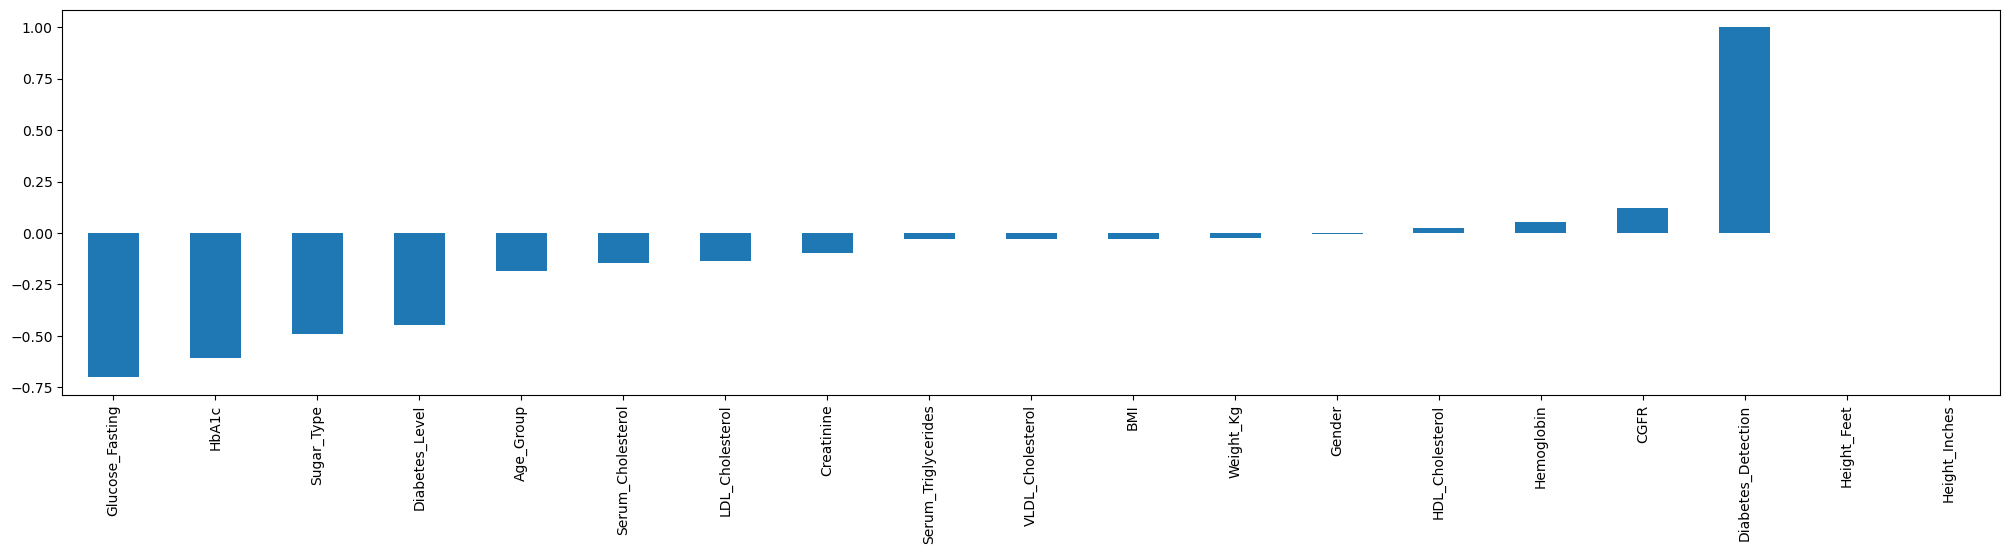

In [18]:
plt.figure(figsize=(25, 5))
df.corr()['Diabetes_Detection'].sort_values().plot(kind='bar')

<Axes: >

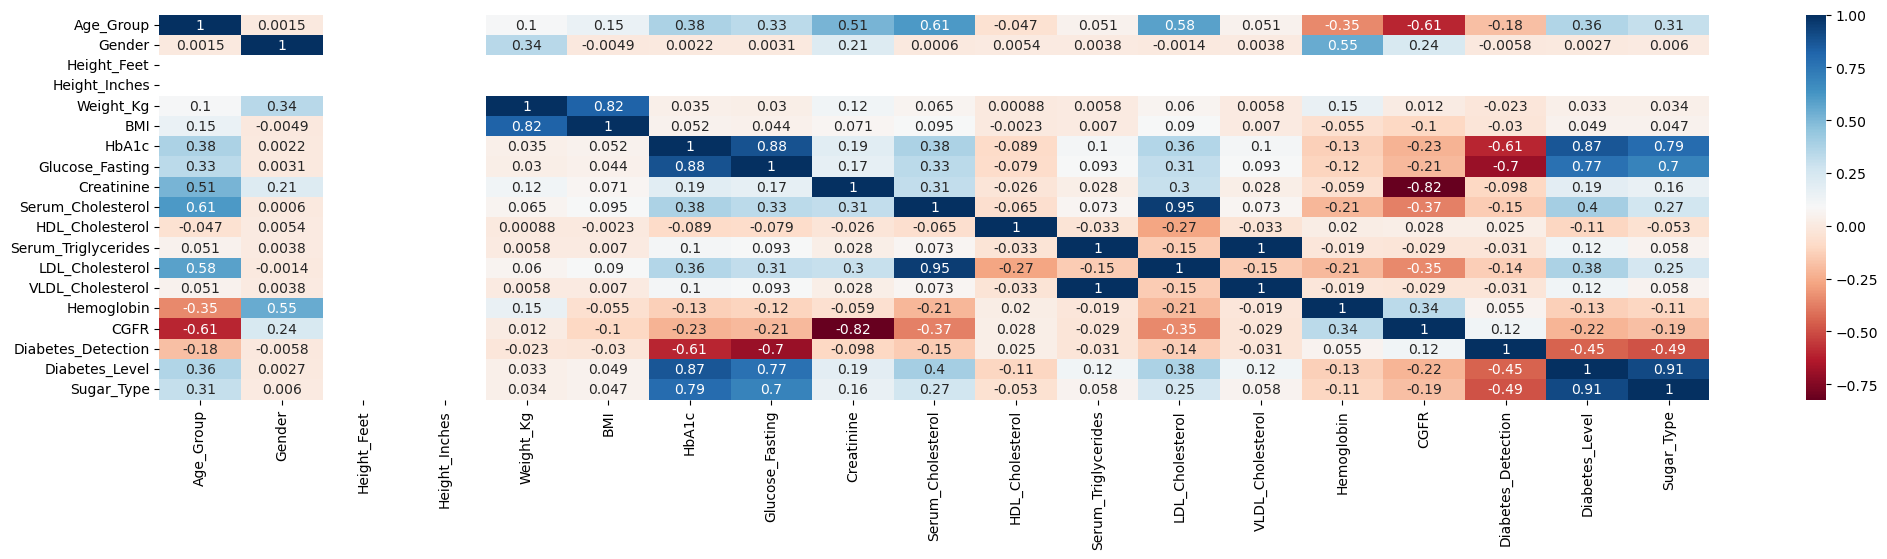

In [19]:
plt.figure(figsize=(25, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdBu")

In [20]:
# fig = plt.figure(figsize=(25, 5))
# sns.pairplot(df, hue='Diabetes_Detection', diag_kind='kde')

In [21]:
diabetes_detection = df.pivot_table(columns='Diabetes_Detection', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_detection

Diabetes_Detection,0,1
BMI,25.943734,25.627138
CGFR,72.743257,80.495587
HbA1c,5.855710,4.929800
Hemoglobin,13.606496,13.777469
Serum_Cholesterol,221.017960,205.734735


<Axes: >

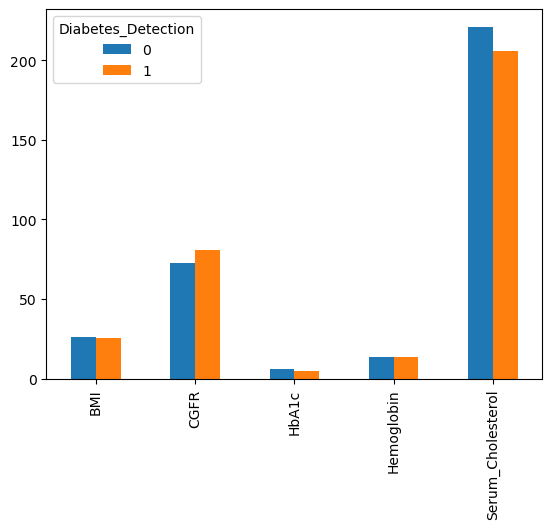

In [22]:
diabetes_detection.plot(kind='bar')

In [23]:
diabetes_aged = df.pivot_table(columns='Age_Group', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_aged

Age_Group,0,1,2,3,4
BMI,24.552166,25.447374,26.510742,26.998482,25.919722
CGFR,101.975595,81.474971,67.450592,57.184157,49.930416
HbA1c,5.302087,5.495458,5.697717,5.895143,6.100377
Hemoglobin,14.231928,13.962414,13.544394,13.102410,12.807999
Serum_Cholesterol,180.054167,201.088987,223.842667,249.756721,265.328822


<Axes: >

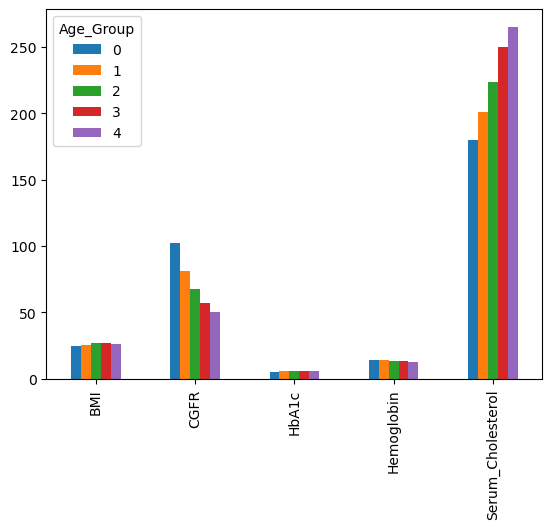

In [24]:
diabetes_aged.plot(kind='bar')

In [25]:
diabetes_gender = df.pivot_table(columns='Gender', values=['Serum_Cholesterol', 'HbA1c', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_gender

Gender,0,1
BMI,25.891208,25.846908
CGFR,68.257208,80.961076
HbA1c,5.636289,5.639189
Hemoglobin,12.928697,14.374083
Serum_Cholesterol,217.393306,217.446917


<Axes: >

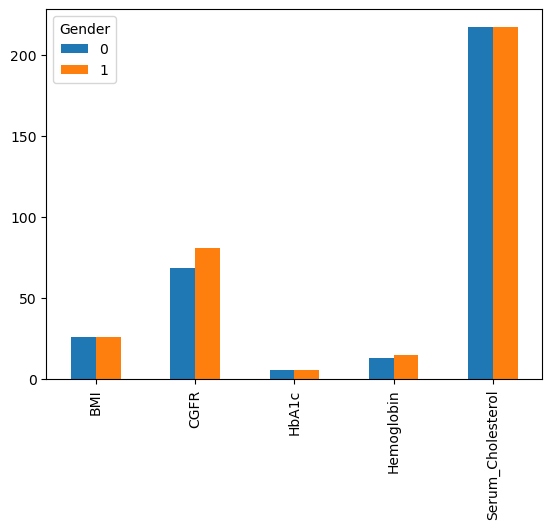

In [26]:
diabetes_gender.plot(kind='bar')

In [27]:
diabetes_sugartype = df.pivot_table(columns='Sugar_Type', values=['LDL_Cholesterol', 'HDL_Cholesterol', 'Hemoglobin', 'CGFR', 'BMI'], aggfunc='mean')
diabetes_sugartype

Sugar_Type,0,1
BMI,25.682953,26.107987
CGFR,79.051450,68.820533
HDL_Cholesterol,49.993037,48.916938
Hemoglobin,13.772358,13.485701
LDL_Cholesterol,127.049135,150.792748


<Axes: >

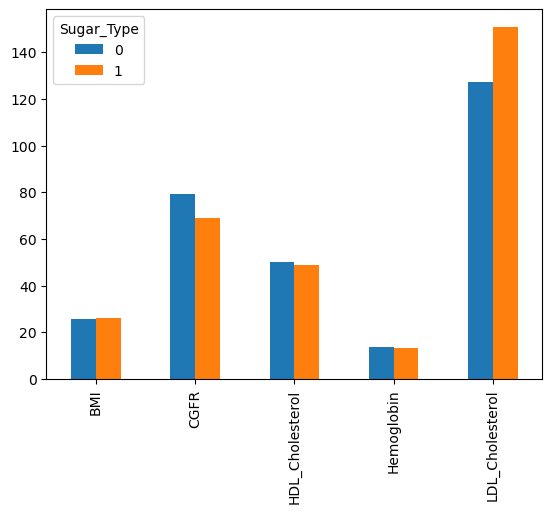

In [28]:
diabetes_sugartype.plot(kind='bar')

# Machine Learning:

In [29]:
df['Diabetes_Detection'].value_counts(normalize=True)

Diabetes_Detection
0    0.764577
1    0.235423
Name: proportion, dtype: float64

In [30]:
X = df.drop('Diabetes_Detection', axis=1)

In [31]:
Y = df['Diabetes_Detection']

In [32]:
smote = SMOTE(random_state=42)

In [33]:
X_resampled, y_resampled = smote.fit_resample(X, Y)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.75)

In [35]:
lc = LogisticRegression(C=0.01, max_iter=10, verbose=1)

In [36]:
rfc = RandomForestClassifier(n_estimators=7, max_depth=2, random_state=42, verbose=1)

In [37]:
lc.fit(x_train, y_train)

E:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.01, max_iter=10, verbose=1)

In [38]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=7, random_state=42, verbose=1)

In [39]:
y_pred_lc = lc.predict(x_test)

In [40]:
y_pred_rfc = rfc.predict(x_test)

In [41]:
print('Classification Matrix of Logistic Regression: ')
print(classification_report(y_test, y_pred_lc))

Classification Matrix of Logistic Regression: 
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     13289
           1       0.80      0.72      0.75      4183

    accuracy                           0.89     17472
   macro avg       0.86      0.83      0.84     17472
weighted avg       0.89      0.89      0.89     17472



In [42]:
print('Classification Matrix of Random Forest: ')
print(classification_report(y_test, y_pred_rfc))

Classification Matrix of Random Forest: 
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     13289
           1       1.00      0.33      0.50      4183

    accuracy                           0.84     17472
   macro avg       0.91      0.67      0.70     17472
weighted avg       0.87      0.84      0.81     17472



<Axes: title={'center': 'Confusion Matrix for Random Forest: '}>

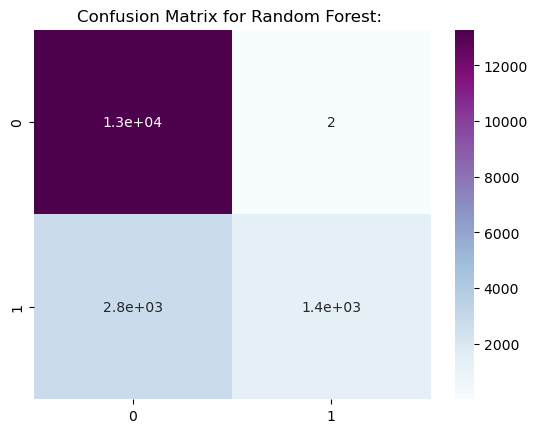

In [43]:
plt.title('Confusion Matrix for Random Forest: ')
sns.heatmap(confusion_matrix(y_test, y_pred_rfc), annot=True, cmap='BuPu')

<Axes: title={'center': 'Confusion Matrix for Logistic Regression: '}>

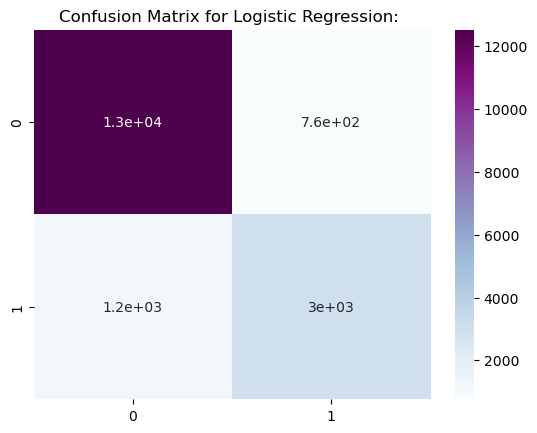

In [44]:
plt.title('Confusion Matrix for Logistic Regression: ')
sns.heatmap(confusion_matrix(y_test, y_pred_lc), annot=True, cmap='BuPu')

In [45]:
accuracy_scores = [
    {'Model': 'Random Forest', 'Accuracy Score': accuracy_score(y_test, y_pred_rfc)},
    {'Model': 'Logistic Regression', 'Accuracy Score': accuracy_score(y_test, y_pred_lc)},
]

In [46]:
accuracy_df = pd.DataFrame(accuracy_scores).sort_values(by='Accuracy Score', ascending=False)

In [47]:
accuracy_df

,Model,Accuracy Score
1,Logistic Regression,0.888450
0,Random Forest,0.840602


<Axes: >

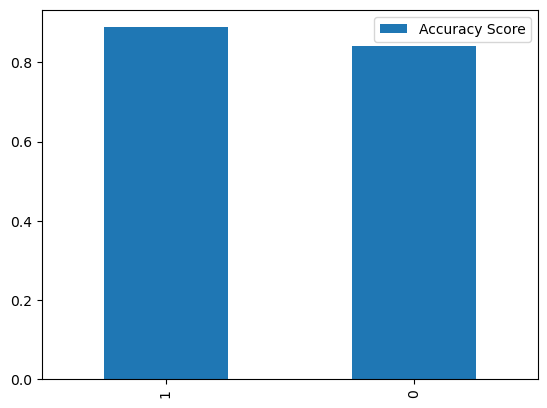

In [48]:
accuracy_df.plot(kind='bar')

# Saving Model: 

In [49]:
jb.dump(rfc, 'Diabetespredictionmodel(RFC).model')

['Diabetespredictionmodel(RFC).model']

In [50]:
jb.dump(lc, 'Diabetespredictionmodel(LC).model')

['Diabetespredictionmodel(LC).model']